In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
DATADIR = "/Users/renu/Desktop/tom&jerry/tom_and_jerry/tom_and_jerry"
labels = ['tom', 'jerry','tom_jerry_0','tom_jerry_1']
Np_data = np.zeros((5478,1))
label = []
training_data = []
i = 0
IMG_SIZE = 480
IMG_SIZE2 = 854
for category in labels:
    path = os.path.join(DATADIR, category) 

for category in labels:
    path = os.path.join(DATADIR, category)
    print(path)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE2))
        numpydata = np.array(new_array)
        np.append(Np_data, numpydata)
        training_data.append([new_array, i])
        label.append(labels[i])
    i =1+i



/Users/renu/Desktop/tom&jerry/tom_and_jerry/tom_and_jerry/tom
/Users/renu/Desktop/tom&jerry/tom_and_jerry/tom_and_jerry/jerry
/Users/renu/Desktop/tom&jerry/tom_and_jerry/tom_and_jerry/tom_jerry_0
/Users/renu/Desktop/tom&jerry/tom_and_jerry/tom_and_jerry/tom_jerry_1


In [4]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(len(X), -1)
y = np.array(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)



In [15]:
#Using the Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)
print("acc", accuracy_score(y_test, y_pred))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1 2 1 ... 2 2 0]
acc 0.6633807959109164


In [16]:
#Logistic Regression

target_names = ['tom', 'jerry','tom_jerry_0','tom_jerry_1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         tom       0.71      0.72      0.71       951
       jerry       0.59      0.70      0.64       622
 tom_jerry_0       0.62      0.60      0.61       777
 tom_jerry_1       0.80      0.60      0.68       389

    accuracy                           0.66      2739
   macro avg       0.68      0.65      0.66      2739
weighted avg       0.67      0.66      0.66      2739



In [20]:
#Using the Random Forests
clf_rf = RandomForestClassifier() 
clf_rf.fit(X_train, y_train) 
y_predict1 = clf_rf.predict(X_test) 
print("acc", accuracy_score(y_test, y_predict1))

acc 0.7838627236217598


In [21]:
#Random Forest Classifier

target_names = ['tom', 'jerry','tom_jerry_0','tom_jerry_1']
print(classification_report(y_test, y_predict1, target_names=target_names))

              precision    recall  f1-score   support

         tom       0.77      0.89      0.82       951
       jerry       0.80      0.77      0.78       622
 tom_jerry_0       0.75      0.73      0.74       777
 tom_jerry_1       0.91      0.67      0.77       389

    accuracy                           0.78      2739
   macro avg       0.81      0.76      0.78      2739
weighted avg       0.79      0.78      0.78      2739



In [5]:
from sklearn.linear_model import SGDClassifier

In [31]:
#Using the SGDClassifier
clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=15)
clf_sgd.fit(X_train, y_train)
y_predict2 = clf_sgd.predict(X_test)
print("acc", accuracy_score(y_test, y_predict2))



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


acc 0.5779481562614093


In [8]:
#SGDClassifier Classifer

target_names = ['tom', 'jerry','tom_jerry_0','tom_jerry_1']
print(classification_report(y_test, y_predict2, target_names=target_names))

              precision    recall  f1-score   support

         tom       0.55      0.89      0.68       951
       jerry       0.61      0.67      0.64       622
 tom_jerry_0       0.82      0.25      0.39       777
 tom_jerry_1       0.72      0.53      0.61       389

    accuracy                           0.61      2739
   macro avg       0.68      0.58      0.58      2739
weighted avg       0.67      0.61      0.58      2739



In [9]:
from sklearn.neural_network import MLPClassifier

In [10]:
#MLP Classifier 
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf_mlp.fit(X_train, y_train)
y_predict3 = clf_sgd.predict(X_test)
print("acc", accuracy_score(y_test, y_predict3))

acc 0.606425702811245


In [11]:
#MLP Classifier 

target_names = ['tom', 'jerry','tom_jerry_0','tom_jerry_1']
print(classification_report(y_test, y_predict3, target_names=target_names))

              precision    recall  f1-score   support

         tom       0.55      0.89      0.68       951
       jerry       0.61      0.67      0.64       622
 tom_jerry_0       0.82      0.25      0.39       777
 tom_jerry_1       0.72      0.53      0.61       389

    accuracy                           0.61      2739
   macro avg       0.68      0.58      0.58      2739
weighted avg       0.67      0.61      0.58      2739



In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Confusion matrix for Logistic Regression


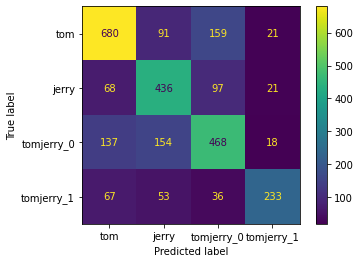

Confusion matrix for Random Forests Classifier


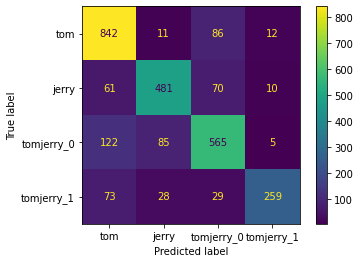

Confusion matrix for Stochastic Gradient Descent Classifier


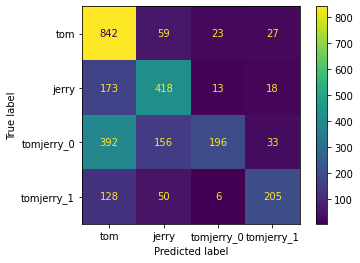

Confusion matrix for Multi-layer Perceptron Classifier


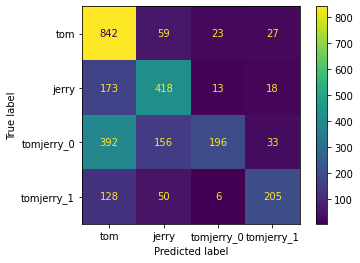

In [30]:
target_names = ['tom', 'jerry','tomjerry_0','tomjerry_1']
print("Confusion matrix for Logistic Regression")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()
print("Confusion matrix for Random Forests Classifier")
cm = confusion_matrix(y_test, y_predict1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()
print("Confusion matrix for Stochastic Gradient Descent Classifier")
cm = confusion_matrix(y_test, y_predict2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()
print("Confusion matrix for Multi-layer Perceptron Classifier")
cm = confusion_matrix(y_test, y_predict3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()